#Support Vector Regression [SVR]

## Importing the libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [61]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [65]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [63]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [66]:
y = y.reshape(len(y),1)

#Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [68]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [69]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#Training the SVR model on the whole dataset

In [71]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#Predict a new value
###we need to inverse feature scaling else we'll be getting 0.01150915 as a result which is not correct

In [75]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))


array([170370.0204065])

#Visualising the SVR results 

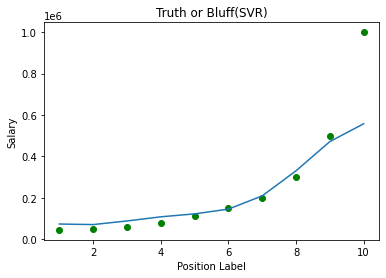

In [77]:
import matplotlib.pyplot as plt
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='g')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

#Visualising the results of the SVR model (for higher resolution and smoother curve)

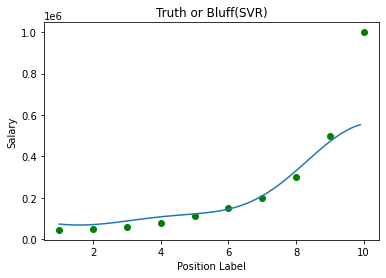

In [83]:
x_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='g')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(x_grid))))
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()